In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails.csv
Saving covid_19_india.csv to covid_19_india.csv
Saving HospitalBedsIndia.csv to HospitalBedsIndia.csv
Saving ICMRTestingLabs.csv to ICMRTestingLabs.csv
Saving IndividualDetails.csv to IndividualDetails.csv
Saving population_india_census2011.csv to population_india_census2011.csv
Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv
Saving WHO-COVID-19-global-data (1).csv to WHO-COVID-19-global-data (1).csv


# **COVID-19 IN INDIA**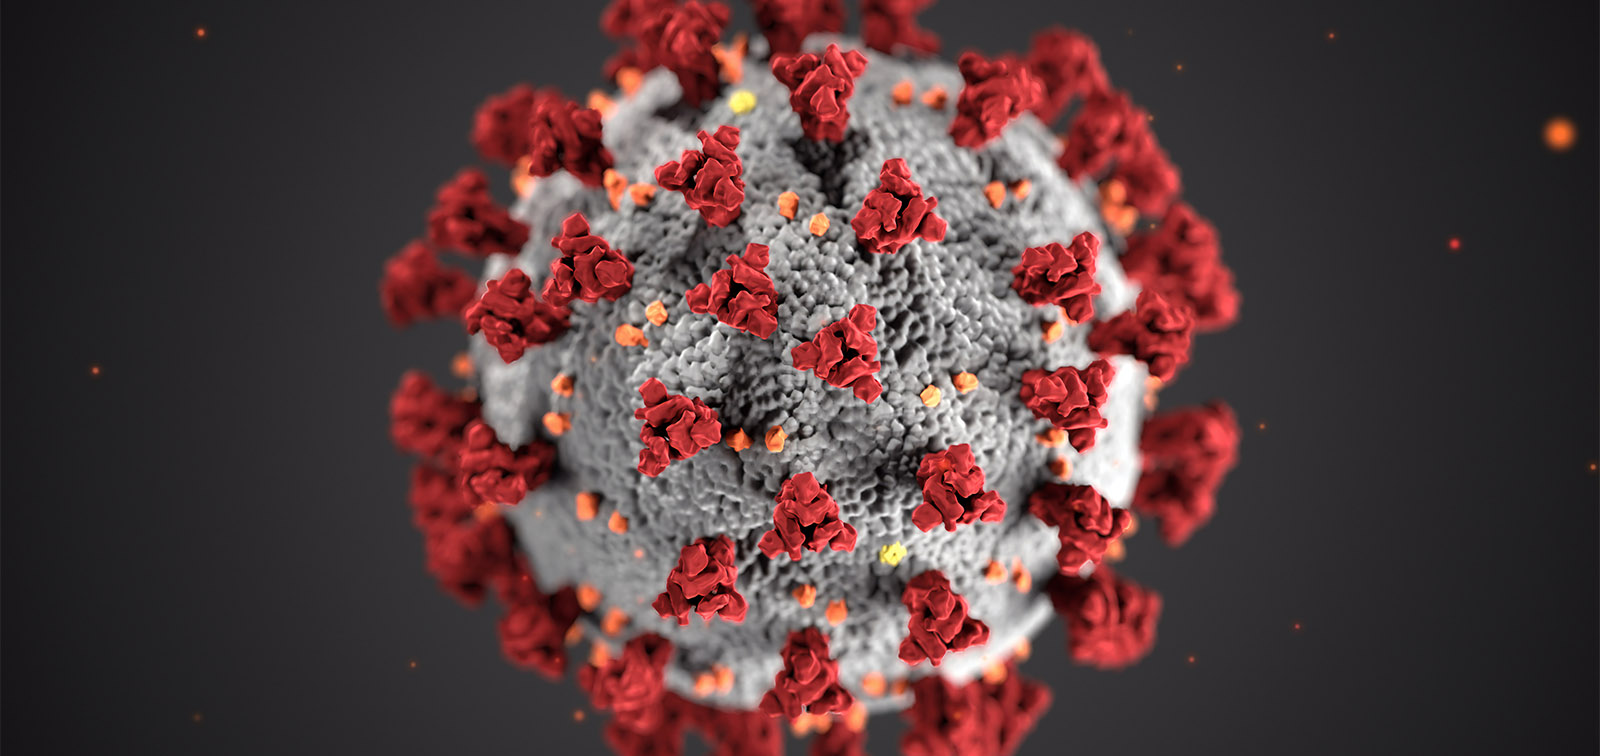

In [9]:
df= pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5506,5507,23/08/20,8:00 AM,Telengana,-,-,80586,755,104249
5507,5508,23/08/20,8:00 AM,Tripura,-,-,6182,72,8702
5508,5509,23/08/20,8:00 AM,Uttarakhand,-,-,10021,195,14566
5509,5510,23/08/20,8:00 AM,Uttar Pradesh,-,-,131295,2867,182453


In [4]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [7]:
df.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Total Active
0,1,30/01/20,6:00 PM,Kerala,0,0,1,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3,3


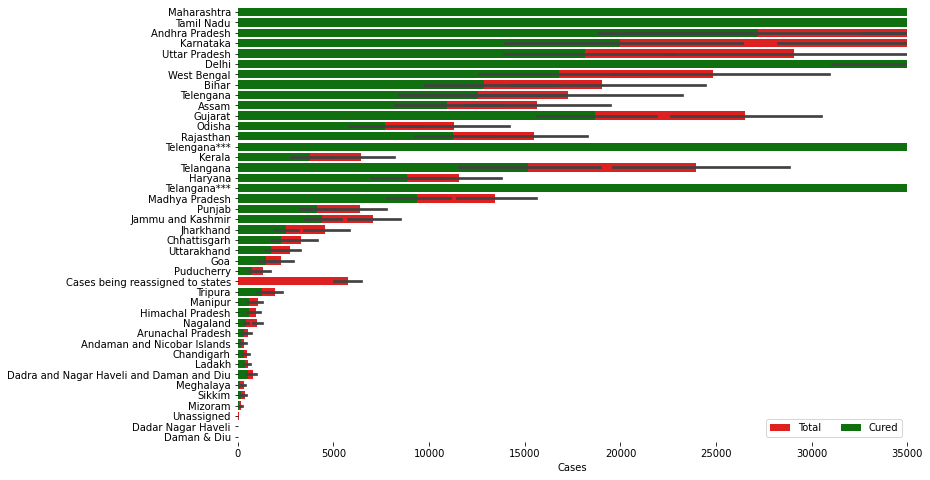

In [38]:
f, ax = plt.subplots(figsize=(12, 8))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## **AGE DETAILS**

In [13]:
age_details=pd.read_csv('AgeGroupDetails.csv')

In [14]:
age_details.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


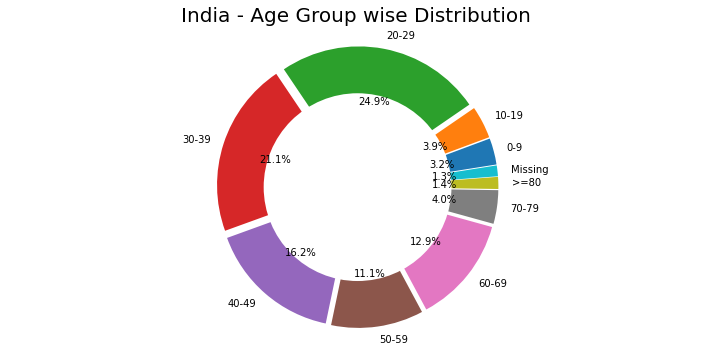

In [15]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [16]:
individual_details=pd.read_csv('IndividualDetails.csv')

In [17]:
individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


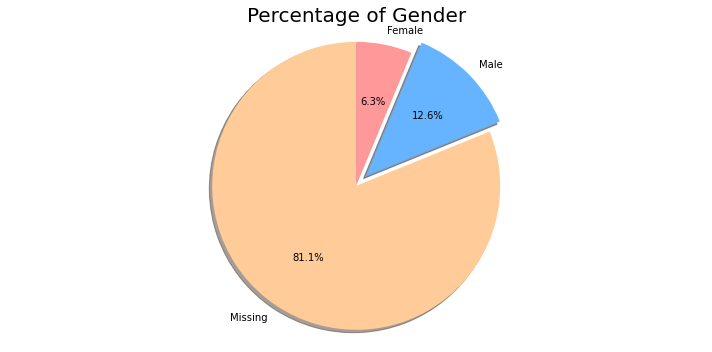

In [18]:
# We could see that the age group <40 is the most affected which is against the trend which says 
# elderly people are more at risk of being affected. Only 17% of people >60 are affected
# '''

labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (10,5))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

# TESTING DETAILS

In [20]:
ICMR_labs=pd.read_csv('ICMRTestingLabs.csv')

In [21]:
ICMR_labs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


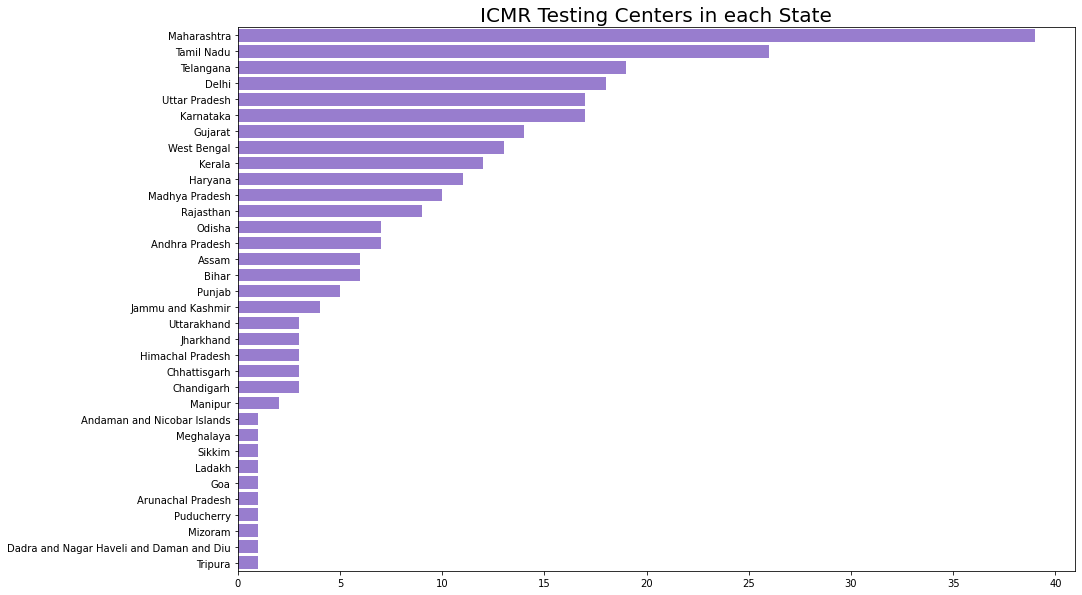

In [22]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#9370db');

In [23]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

In [24]:
import plotly
plotly.io.renderers.default = 'colab'

In [25]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [26]:
df_confirmed_india

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
202,2020-08-19,2767273
203,2020-08-20,2836925
204,2020-08-21,2905823
205,2020-08-22,2975701


In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y=df_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_death_india['Date'], y=df_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_cured_india['Date'], y=df_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [35]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [36]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,2808,32,1853,4629,1.14,65.99
1,Andhra Pradesh,345216,3189,252638,594665,0.92,73.18
2,Arunachal Pradesh,3223,5,2228,5446,0.16,69.13
3,Assam,89468,234,67641,156875,0.26,75.60
4,Bihar,119529,503,94858,213884,0.42,79.36


In [41]:

state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,671942,21995,480114,1130061,3.270000,71.450000
32,Tamil Nadu,373410,6420,313280,680270,1.720000,83.900000
1,Andhra Pradesh,345216,3189,252638,594665,0.920000,73.180000
18,Karnataka,271876,4615,184568,451829,1.700000,67.890000
39,Uttar Pradesh,182453,2867,131295,310881,1.570000,71.960000
11,Delhi,160016,4284,144138,299870,2.680000,90.080000
41,West Bengal,135596,2737,104959,237818,2.020000,77.410000
4,Bihar,119529,503,94858,213884,0.420000,79.360000
35,Telengana,104249,755,80586,184080,0.720000,77.300000
3,Assam,89468,234,67641,156875,0.260000,75.600000


In [42]:
all_state = list(df['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
#all_state.remove('Nagaland#')
#all_state.remove('Nagaland')
latest = df[df['Date'] > '10-08-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]

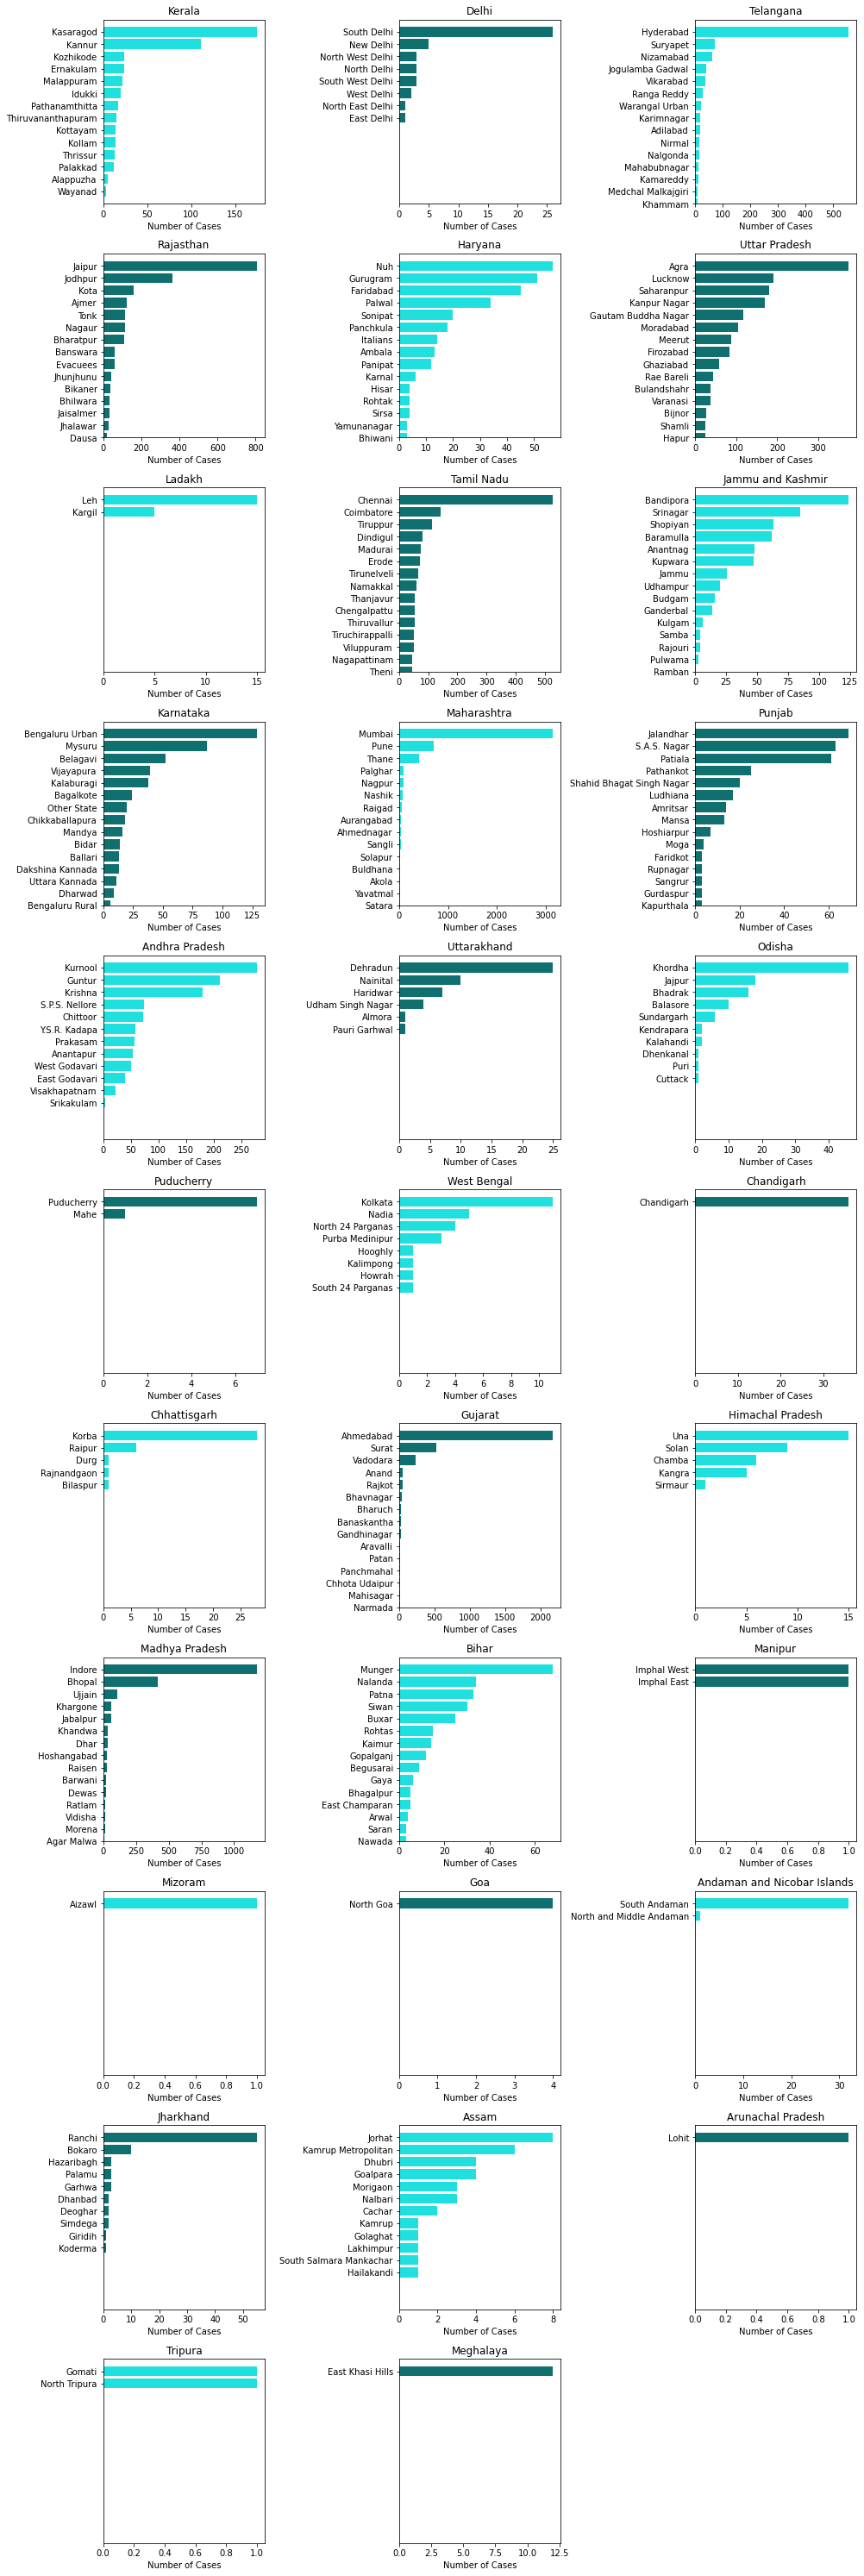

In [43]:
colors_list = ['cyan','teal']
states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/3)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,3,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
        g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
        plt.xlabel('Number of Cases')
        plt.ylabel('')
        plt.title(state)
        plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()
plt.show()


In [84]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv
Saving time_series_covid_19_deaths.csv to time_series_covid_19_deaths.csv
Saving time_series_covid_19_recovered.csv to time_series_covid_19_recovered.csv


In [85]:
confirmed_df=pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df=pd.read_csv('time_series_covid_19_deaths.csv')
recovered_df=pd.read_csv('time_series_covid_19_recovered.csv')

In [89]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [86]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered + world_deaths)

In [87]:
world_confirmed.head()

8/22/20    23203532
dtype: int64

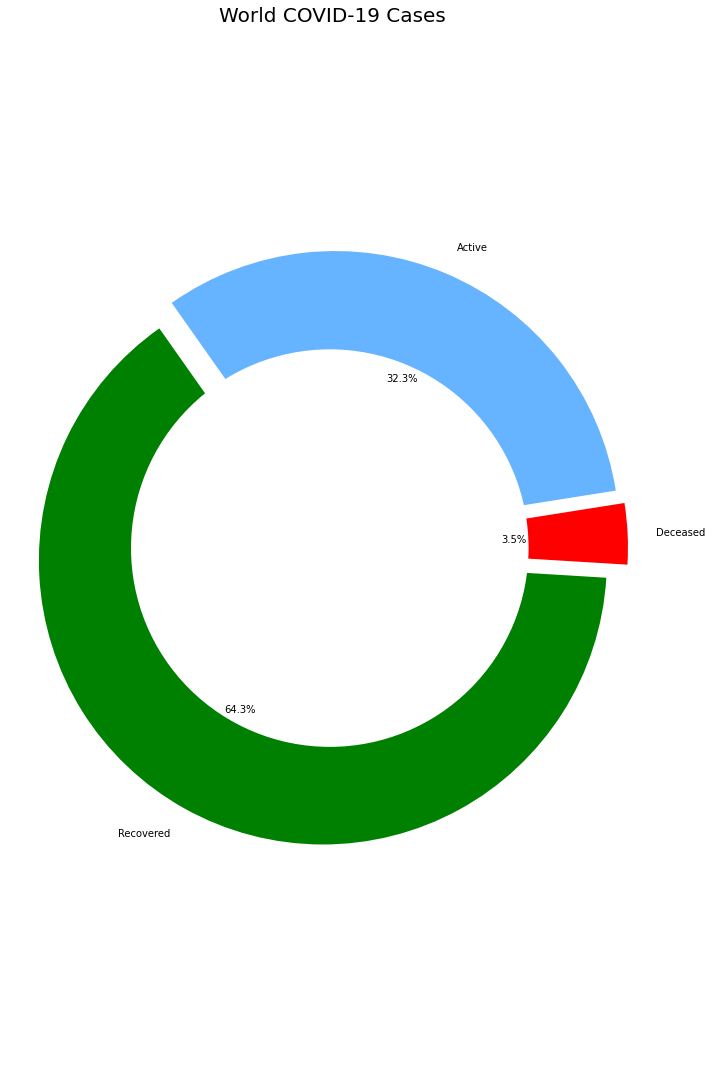

In [88]:
labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['#66b3ff','green','red']
explode = []
for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (10,15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [92]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [93]:
df1=pd.read_csv('covid_19_data.csv')

In [95]:
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [98]:
df1.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [96]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df1.groupby('ObservationDate').sum().head()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [110]:
confirmed = df1.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df1.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df1.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [101]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['ObservationDate'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['ObservationDate'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['ObservationDate'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [105]:
df_confirmed = confirmed_df[["Province/State","Lat","Long","Country/Region"]]
df_temp = df1.copy()
df_temp['Country/Region'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country/Region", "Province/State"])

In [107]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="ObservationDate", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [108]:
from fbprophet import Prophet

In [111]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [112]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
216,2020-08-25
217,2020-08-26
218,2020-08-27
219,2020-08-28
220,2020-08-29


In [113]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2020-08-25,2.387125e+07,2.379588e+07,2.394690e+07
217,2020-08-26,2.413111e+07,2.405245e+07,2.420984e+07
218,2020-08-27,2.439102e+07,2.430601e+07,2.447682e+07
219,2020-08-28,2.465610e+07,2.455446e+07,2.475630e+07
220,2020-08-29,2.490915e+07,2.479327e+07,2.503407e+07


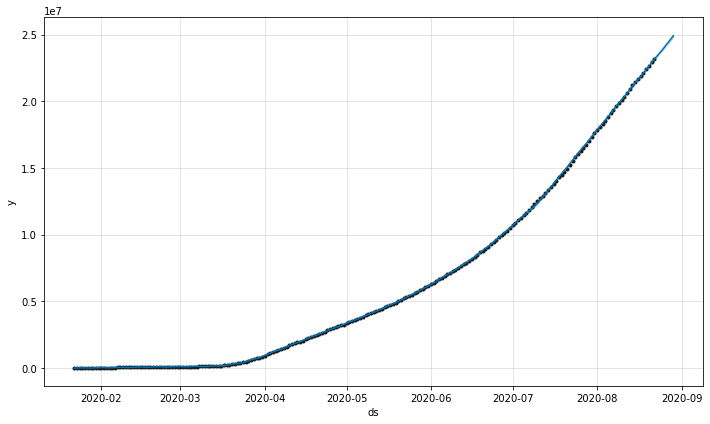

In [114]:
confirmed_forecast_plot = m.plot(forecast)

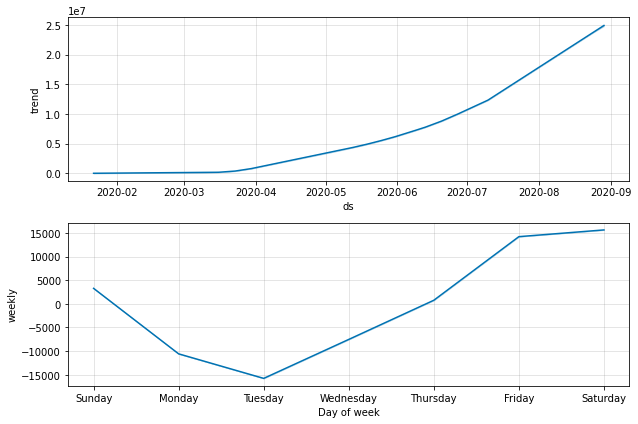

In [115]:
confirmed_forecast_plot =m.plot_components(forecast)

In [116]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [117]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
216,2020-08-25
217,2020-08-26
218,2020-08-27
219,2020-08-28
220,2020-08-29


In [118]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2020-08-25,823122.984620,820450.119577,825867.057668
217,2020-08-26,829526.521266,826249.494642,833293.079070
218,2020-08-27,835928.822238,831646.371986,840590.228481
219,2020-08-28,842237.220278,837101.143151,847796.380216
220,2020-08-29,847806.473238,840607.451122,855433.279213


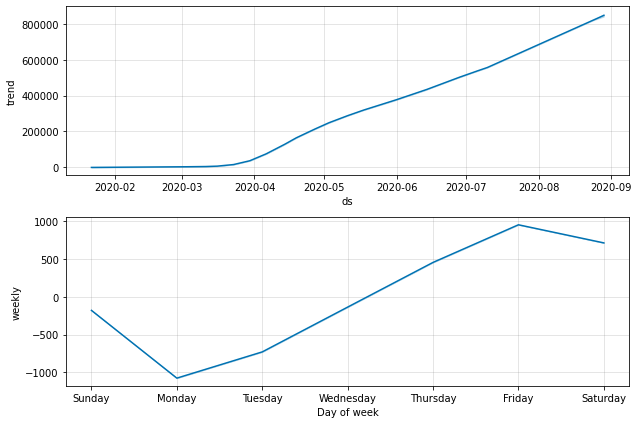

In [119]:
deaths_forecast_plot = m.plot_components(forecast)

In [126]:
df1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
93053,93054,08/22/2020,Zaporizhia Oblast,Ukraine,2020-08-23 04:27:48,1287.0,24.0,767.0
93054,93055,08/22/2020,Zeeland,Netherlands,2020-08-23 04:27:48,1008.0,69.0,0.0
93055,93056,08/22/2020,Zhejiang,Mainland China,2020-08-23 04:27:48,1277.0,1.0,1268.0
93056,93057,08/22/2020,Zhytomyr Oblast,Ukraine,2020-08-23 04:27:48,2734.0,57.0,1728.0


In [128]:
df1.rename(columns={'Country/Region':'Country'}, inplace=True)

In [131]:
india=df1.query('Country=="India"').groupby("ObservationDate")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [132]:
india

,ObservationDate,Confirmed,Deaths,Recovered
0,01/30/2020,1.0,0.0,0.0
1,01/31/2020,1.0,0.0,0.0
2,02/01/2020,1.0,0.0,0.0
3,02/02/2020,2.0,0.0,0.0
4,02/03/2020,3.0,0.0,0.0
...,...,...,...,...
201,08/18/2020,2767253.0,52888.0,2037816.0
202,08/19/2020,2836925.0,53866.0,2096664.0
203,08/20/2020,2905825.0,54849.0,2158946.0
204,08/21/2020,2975701.0,55794.0,2222577.0


In [133]:
confirmed_india = india.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths_india = india.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered_india = india.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [134]:
confirmed_india

,ObservationDate,Confirmed
0,01/30/2020,1.0
1,01/31/2020,1.0
2,02/01/2020,1.0
3,02/02/2020,2.0
4,02/03/2020,3.0
...,...,...
201,08/18/2020,2767253.0
202,08/19/2020,2836925.0
203,08/20/2020,2905825.0
204,08/21/2020,2975701.0


In [135]:
confirmed_india.columns = ['ds','y']
confirmed_india['ds'] = pd.to_datetime(confirmed['ds'])

In [140]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_india)
future = m.make_future_dataframe(periods=21)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
222,2020-08-31
223,2020-09-01
224,2020-09-02
225,2020-09-03
226,2020-09-04


In [141]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
222,2020-08-31,3.780924e+06,3.662650e+06,3.891257e+06
223,2020-09-01,3.834724e+06,3.711597e+06,3.944295e+06
224,2020-09-02,3.888153e+06,3.772667e+06,4.001930e+06
225,2020-09-03,3.941144e+06,3.804208e+06,4.066228e+06
226,2020-09-04,3.994728e+06,3.856680e+06,4.129519e+06


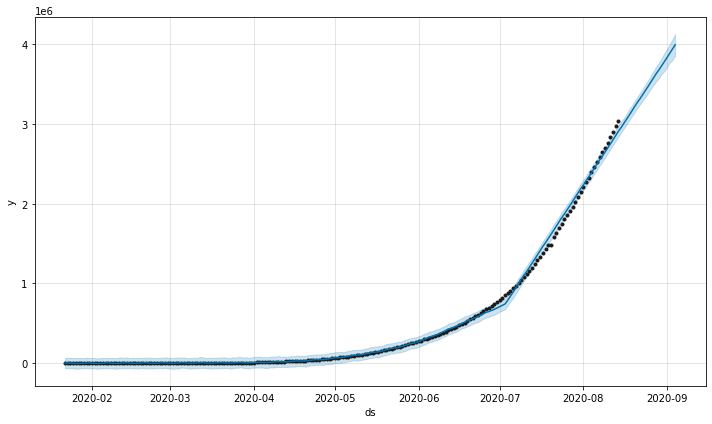

In [142]:
confirmed_forecast_plot = m.plot(forecast)

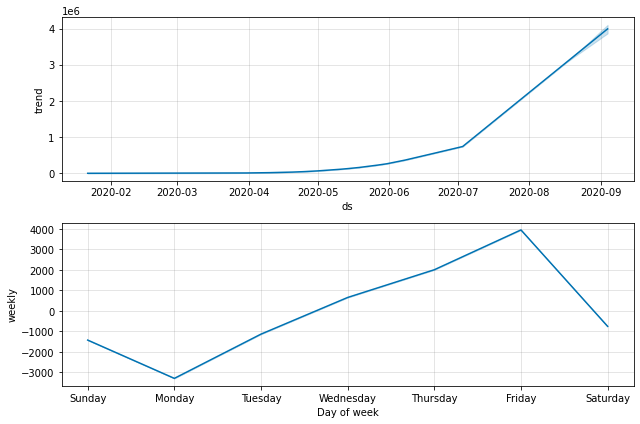

In [143]:
confirmed_forecast_plot =m.plot_components(forecast)